# Machine Learning Models
Pipeline of the tuning process: <br>
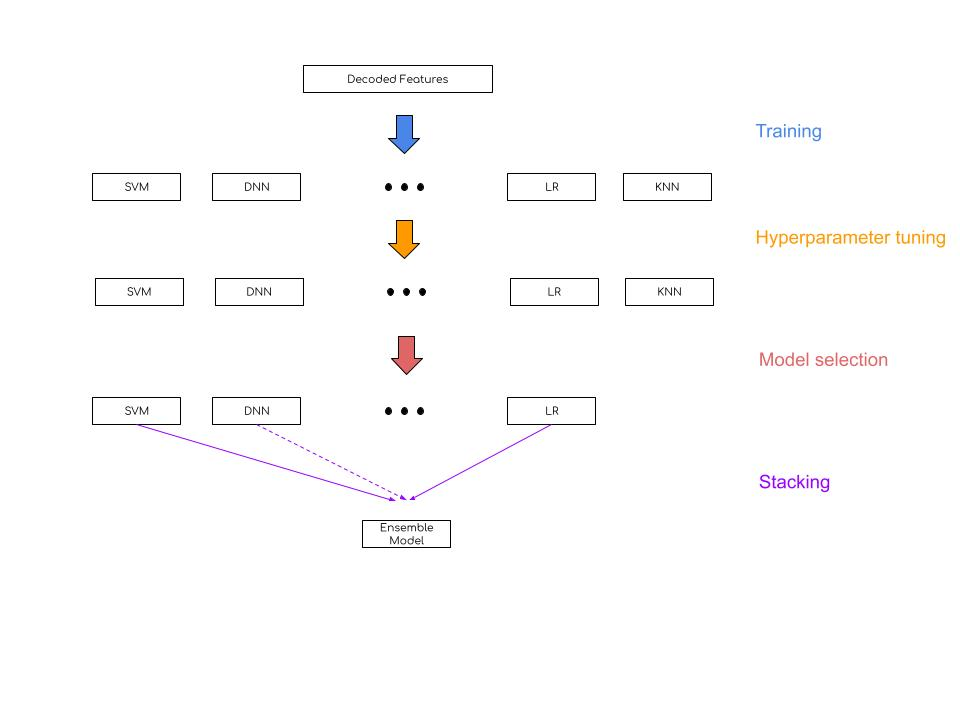

## Neural Networks

### Further Data Analysis with DNN
We'll use DNN to explore the features with high MI scores described in the previous **Feature Analysis** section

In [ ]:
Y = pd.read_pickle('y.pkl')
Y = Y.values.astype(float)  

In [ ]:
# evaluate test set performance at the end of each epoch
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        test_acc_history.append(self.model.evaluate(x_test, y_test, verbose=0)[1])
        if (epoch + 1) % 5 == 0:
            print(f"{epoch + 1} epoch with test_acc: {test_acc_history[epoch]}")

In [ ]:
# Build model using keras's Sequential API
def create_nn(dropout_rate=0.4, learn_rate=0.0007):
    neural_network = Sequential()
    neural_network.add(Dense(2048, activation="relu"))
    neural_network.add(Dropout(dropout_rate))
    neural_network.add(Dense(1024, activation="relu"))
    neural_network.add(Dropout(dropout_rate))
    neural_network.add(Dense(512, activation="relu"))
    neural_network.add(Dropout(dropout_rate))
    neural_network.add(Dense(128, activation="relu"))
    neural_network.add(Dropout(dropout_rate))
    neural_network.add(Dense(1, activation="sigmoid"))
    # reproducible results
    np.random.seed(37)
    tf.random.set_seed(89)
    opt = Adam(lr=learn_rate)
    neural_network.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return neural_network

In [ ]:
def calculate_f1(model, y_true):
  y_pred = np.squeeze(model.predict(x_test))
  y_pred[y_pred > 0.5] = 1
  y_pred[y_pred <= 0.5] = 0
  y_true = y_test
  return f1_score(y_true, y_pred)

#### We're going to compare the top 4 bands of each individual filter to determine the best filter

In [ ]:
test_acc_all = []
for idx, col_name in enumerate(best_bands.columns.values):
    top_eeg_feature_names = [str(col_name) + " " + str(band) for band in best_bands.iloc[0:4, idx]]
    print(col_name + " is being processed")
    x_train, x_test, y_train, y_test = split_data(top_eeg_feature_names)
    model = create_nn(0.6)
    epochs = 50
    test_acc_history = list()  # reset test accuracy history
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, callbacks=[CustomCallback()], verbose=0)
    test_acc_all.append(test_acc_history)

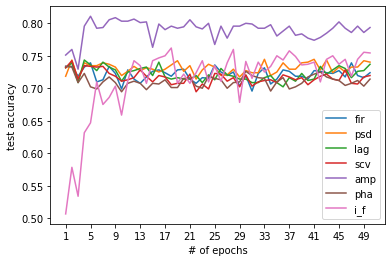

In [ ]:
plt.xlabel("# of epochs")
plt.ylabel("test accuracy")
for test_acc in test_acc_all:
    plt.plot(range(1, epochs + 1), test_acc)
plt.legend(best_bands.columns.values.tolist())
plt.xticks(np.arange(1, epochs + 1, int(((epochs + 1) / 11))))
plt.show()

#### We're going to use the top 4 features of amp filter in terms of MI score and concatenate it with the EOG features as our input

In [ ]:
top_eeg_feature_names = ["amp (12, 16)", "amp (8, 30)", "amp (10, 14)", "amp (24, 28)"]
x_train, x_test, y_train, y_test = split_data(top_eeg_feature_names)
model = create_nn(0.6)
epochs = 50
test_acc_history = list()  # reset test accuracy history
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, callbacks=[CustomCallback()], verbose=0)

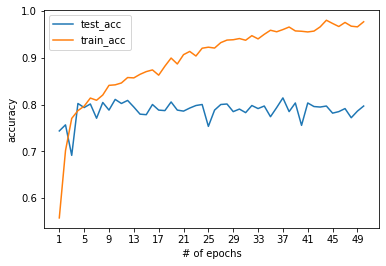

In [ ]:
plt.plot(range(1, epochs + 1), test_acc_history)
plt.plot(range(1, epochs + 1), history.history["accuracy"])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.legend(["test_acc", "train_acc"])
plt.xticks(np.arange(1, epochs + 1, int(((epochs + 1) / 11))))
plt.show()

In [ ]:
print("test_acc (every 5 epoch)", test_acc_history[::5])
print("train_acc (every 5 epoch)", history.history["accuracy"][::5])
print("mean_test_acc_after_20_epoch (plateau point)", mean(test_acc_history[20:]))
print("std_test_acc_after_20_epoch (plateau point)", stdev(test_acc_history[20:]))
print("F1_score:", calculate_f1(model, y_test))

test_acc (every 5 epoch) [0.7434782385826111, 0.801086962223053, 0.802173912525177, 0.800000011920929, 0.7858695387840271, 0.7880434989929199, 0.782608687877655, 0.79347825050354, 0.803260862827301, 0.7847825884819031]
train_acc (every 5 epoch) [0.5576087236404419, 0.8137680888175964, 0.8460144996643066, 0.873913049697876, 0.906521737575531, 0.9206521511077881, 0.9373188614845276, 0.9554347991943359, 0.9550724625587463, 0.9666666388511658]
mean_test_acc_after_20_epoch (plateau point) 0.7896376748879751
std_test_acc_after_20_epoch (plateau point) 0.013089416087152793
F1_score: 0.7951807228915662


#### We're going to use the top 6 features of amp filter in terms of MI score and concatenate it with the EOG features as our input 

In [ ]:
top_eeg_feature_names = ["amp (12, 16)", "amp (8, 30)", "amp (10, 14)", "amp (24, 28)", "amp (14, 18)", "amp (22, 26)"]
x_train, x_test, y_train, y_test = split_data(top_eeg_feature_names)
model = create_nn(0.6)
epochs = 50
test_acc_history = list()  # reset test accuracy history
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, callbacks=[CustomCallback()], verbose=0)

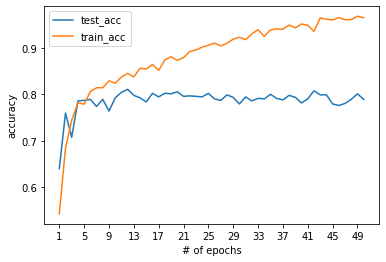

In [ ]:
plt.plot(range(1, epochs + 1), test_acc_history)
plt.plot(range(1, epochs + 1), history.history["accuracy"])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.legend(["test_acc", "train_acc"])
plt.xticks(np.arange(1, epochs + 1, int(((epochs + 1) / 11))))
plt.show()

In [ ]:
print("test_acc (every 5 epoch)", test_acc_history[::5])
print("train_acc (every 5 epoch)", history.history["accuracy"][::5])
print("mean_test_acc_after_20_epoch (plateau point)", mean(test_acc_history[20:]))
print("std_test_acc_after_20_epoch (plateau point)", stdev(test_acc_history[20:]))
print("F1_score:", calculate_f1(model, y_test))

test_acc (every 5 epoch) [0.6402173638343811, 0.789130449295044, 0.804347813129425, 0.802173912525177, 0.7956521511077881, 0.790217399597168, 0.7945652008056641, 0.791304349899292, 0.790217399597168, 0.7760869860649109]
train_acc (every 5 epoch) [0.5431159138679504, 0.8057971000671387, 0.8369565010070801, 0.864130437374115, 0.8789855241775513, 0.9097825884819031, 0.917391300201416, 0.9405797123908997, 0.9485507011413574, 0.9648550748825073]
mean_test_acc_after_20_epoch (plateau point) 0.7919565260410308
std_test_acc_after_20_epoch (plateau point) 0.007566275824122814
F1_score: 0.7868131868131869


#### We're going to use the top 4 features of amp filter in terms of MI score and "without" concatenating it with the EOG features as our input

In [ ]:
top_eeg_feature_names = ["amp (12, 16)", "amp (8, 30)", "amp (10, 14)", "amp (24, 28)"]
x_train, x_test, y_train, y_test = split_data(top_eeg_feature_names, eog_features=False)
model = create_nn(0.6)
epochs = 50
test_acc_history = list()  # reset test accuracy history
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, callbacks=[CustomCallback()], verbose=0)

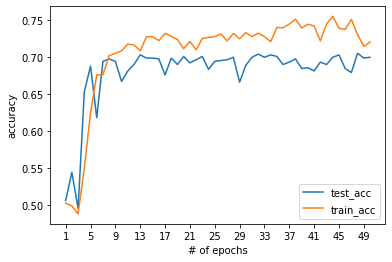

In [ ]:
plt.plot(range(1, epochs + 1), test_acc_history)
plt.plot(range(1, epochs + 1), history.history["accuracy"])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.legend(["test_acc", "train_acc"])
plt.xticks(np.arange(1, epochs + 1, int(((epochs + 1) / 11))))
plt.show()

In [ ]:
print("test_acc (every 5 epoch)", test_acc_history[::5])
print("train_acc (every 5 epoch)", history.history["accuracy"][::5])
print("mean_test_acc_after_20_epoch (plateau point)", mean(test_acc_history[20:]))
print("std_test_acc_after_20_epoch (plateau point)", stdev(test_acc_history[20:]))
print("F1_score:", calculate_f1(model, y_test))

test_acc (every 5 epoch) [0.5065217614173889, 0.6184782385826111, 0.6815217137336731, 0.697826087474823, 0.6923912763595581, 0.695652186870575, 0.699999988079071, 0.6902173757553101, 0.6815217137336731, 0.6847826242446899]
train_acc (every 5 epoch) [0.5028985738754272, 0.676086962223053, 0.7177536487579346, 0.7224637866020203, 0.7213768362998962, 0.731521725654602, 0.7278985381126404, 0.7398550510406494, 0.7423912882804871, 0.7376811504364014]
mean_test_acc_after_20_epoch (plateau point) 0.6938043495019277
std_test_acc_after_20_epoch (plateau point) 0.008867999580407245
F1_score: 0.7245508982035928


#### We're going to use the top 4 features of amp, i_f, and psd filter in terms of MI score and concatenate it with the EOG features as our input

In [ ]:
top_eeg_feature_names = ["amp (12, 16)", "amp (8, 30)", "amp (10, 14)", "amp (24, 28)",
                        "i_f (12, 16)", "i_f (8, 30)", "i_f (14, 18)", "i_f (10, 14)",
                        "psd (20, 24)", "psd (8, 30)", "psd (22, 26)", "psd (18, 22)"]
x_train, x_test, y_train, y_test = split_data(top_eeg_feature_names)
model = create_nn(0.6)
epochs = 50
test_acc_history = list()  # reset test accuracy history
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, callbacks=[CustomCallback()], verbose=0)

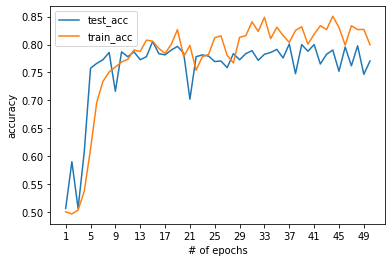

In [ ]:
plt.plot(range(1, epochs + 1), test_acc_history)
plt.plot(range(1, epochs + 1), history.history["accuracy"])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.legend(["test_acc", "train_acc"])
plt.xticks(np.arange(1, epochs + 1, int(((epochs + 1) / 11))))
plt.show()

In [ ]:
print("test_acc (every 5 epoch)", test_acc_history[::5])
print("train_acc (every 5 epoch)", history.history["accuracy"][::5])
print("mean_test_acc_after_20_epoch (plateau point)", mean(test_acc_history[20:]))
print("std_test_acc_after_20_epoch (plateau point)", stdev(test_acc_history[20:]))
print("F1_score:", calculate_f1(model, y_test))

test_acc (every 5 epoch) [0.5065217614173889, 0.7663043737411499, 0.7782608866691589, 0.783695638179779, 0.7021738886833191, 0.770652174949646, 0.789130449295044, 0.7760869860649109, 0.800000011920929, 0.7956521511077881]
train_acc (every 5 epoch) [0.5003623366355896, 0.6963768005371094, 0.7735507488250732, 0.7931159138679504, 0.7985507249832153, 0.8155797123908997, 0.8405796885490417, 0.8163043260574341, 0.8184782862663269, 0.7989130616188049]
mean_test_acc_after_20_epoch (plateau point) 0.7759057978789011
std_test_acc_after_20_epoch (plateau point) 0.020473036112906188
F1_score: 0.7941463414634147


#### We're going to use the top 4 features in terms of MI score and concatenate it with the EOG features as our input

In [ ]:
top_eeg_feature_names = ["i_f (12, 16)", "pha (12, 16)", "amp (12, 16)", "scv (20, 24)"]
x_train, x_test, y_train, y_test = split_data(top_eeg_feature_names)
model = create_nn(0.6)
epochs = 50
test_acc_history = list()  # reset test accuracy history
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, callbacks=[CustomCallback()], verbose=0)

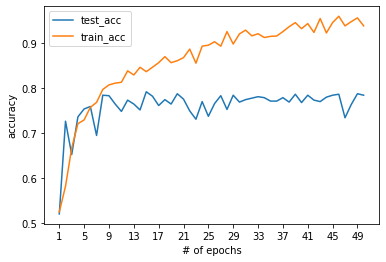

In [ ]:
plt.plot(range(1, epochs + 1), test_acc_history)
plt.plot(range(1, epochs + 1), history.history["accuracy"])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.legend(["test_acc", "train_acc"])
plt.xticks(np.arange(1, epochs + 1, int(((epochs + 1) / 11))))
plt.show()

In [ ]:
print("test_acc (every 5 epoch)", test_acc_history[::5])
print("train_acc (every 5 epoch)", history.history["accuracy"][::5])
print("mean_test_acc_after_20_epoch (plateau point)", mean(test_acc_history[20:]))
print("std_test_acc_after_20_epoch (plateau point)", stdev(test_acc_history[20:]))
print("F1_score:", calculate_f1(model, y_test))

test_acc (every 5 epoch) [0.520652174949646, 0.758695662021637, 0.747826099395752, 0.781521737575531, 0.7749999761581421, 0.7652173638343811, 0.7739130258560181, 0.770652174949646, 0.783695638179779, 0.7858695387840271]
train_acc (every 5 epoch) [0.5249999761581421, 0.7568840384483337, 0.8123188614845276, 0.845652163028717, 0.8670290112495422, 0.9021739363670349, 0.9278985261917114, 0.9148550629615784, 0.9423912763595581, 0.958695650100708]
mean_test_acc_after_20_epoch (plateau point) 0.7702173888683319
std_test_acc_after_20_epoch (plateau point) 0.015484379036081346
F1_score: 0.7843986998916577


#### We're going to use the top 8 features in terms of MI score and concatenate it with the EOG features as our input

In [ ]:
top_eeg_feature_names = ["i_f (12, 16)", "pha (12, 16)", "amp (12, 16)", "scv (20, 24)", 
                         "lag (20, 24)", "psd (20, 24)", "amp (8, 30)", "scv (8, 30)"]
x_train, x_test, y_train, y_test = split_data(top_eeg_feature_names)
model = create_nn(0.6)
epochs = 50
test_acc_history = list()  # reset test accuracy history
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, callbacks=[CustomCallback()], verbose=0)

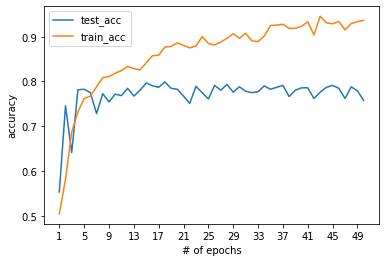

In [ ]:
plt.plot(range(1, epochs + 1), test_acc_history)
plt.plot(range(1, epochs + 1), history.history["accuracy"])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.legend(["test_acc", "train_acc"])
plt.xticks(np.arange(1, epochs + 1, int(((epochs + 1) / 11))))
plt.show()

In [ ]:
print("test_acc (every 5 epoch)", test_acc_history[::5])
print("train_acc (every 5 epoch)", history.history["accuracy"][::5])
print("mean_test_acc_after_20_epoch (plateau point)", mean(test_acc_history[20:]))
print("std_test_acc_after_20_epoch (plateau point)", stdev(test_acc_history[20:]))
print("F1_score:", calculate_f1(model, y_test))

test_acc (every 5 epoch) [0.553260862827301, 0.7749999761581421, 0.768478274345398, 0.790217399597168, 0.7673913240432739, 0.791304349899292, 0.7782608866691589, 0.7869565486907959, 0.7858695387840271, 0.7847825884819031]
train_acc (every 5 epoch) [0.5043478012084961, 0.7673913240432739, 0.8242753744125366, 0.8576086759567261, 0.8804348111152649, 0.8815217614173889, 0.907608687877655, 0.9257246255874634, 0.9333333373069763, 0.9340579509735107]
mean_test_acc_after_20_epoch (plateau point) 0.778695656855901
std_test_acc_after_20_epoch (plateau point) 0.011477028780890543
F1_score: 0.7772227772227772


#### We're going to compare the top 6 bands of amp in terms of MI score and concatenate it with the EOG features 

In [ ]:
test_acc_all = []
top_eeg_feature_names = ["amp (12, 16)", "amp (8, 30)", "amp (10, 14)", "amp (24, 28)", "amp (14, 18)", "amp (22, 26)"]
for feature_name in top_eeg_feature_names:
    print(feature_name, "is being processed")
    x_train, x_test, y_train, y_test = split_data([feature_name])
    model = create_nn(0.6)
    epochs = 50
    test_acc_history = list()  # reset test accuracy history
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, callbacks=[CustomCallback()], verbose=0)
    test_acc_all.append(test_acc_history)

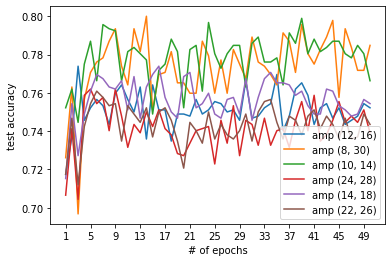

In [ ]:
plt.xlabel("# of epochs")
plt.ylabel("test accuracy")
for test_acc in test_acc_all:
    plt.plot(range(1, epochs + 1), test_acc)
plt.legend(top_eeg_feature_names)
plt.xticks(np.arange(1, epochs + 1, int(((epochs + 1) / 11))))
plt.show()

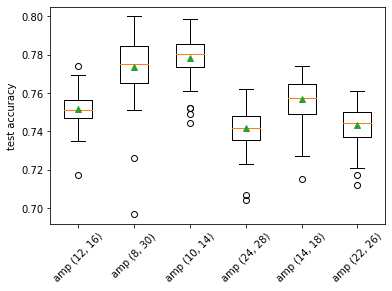

amp (12, 16): mean 0.751434782743454 std 0.009575692939959194
amp (8, 30): mean 0.7735434794425964 std 0.017757092055526003
amp (10, 14): mean 0.778195651769638 std 0.012390118569750773
amp (24, 28): mean 0.7416521728038787 std 0.011903853350460198
amp (14, 18): mean 0.7566956543922424 std 0.01083926238514947
amp (22, 26): mean 0.7434347844123841 std 0.009832906686085515


In [ ]:
plt.ylabel("test accuracy")
plt.boxplot(test_acc_all, labels=top_eeg_feature_names, showmeans=True)
plt.xticks(rotation=45)
plt.show()
for i, feature_name in enumerate(top_eeg_feature_names):
    print(f"{feature_name}: mean {mean(test_acc_all[i])} std {stdev(test_acc_all[i])}")

#### We're going to concatenate the best performing combinations of amp bands and EOG according to the result above

In [ ]:
top_eeg_feature_names = ["amp (10, 14)", "amp (8, 30)", "amp (14, 18)", "amp (12, 16)"]
x_train, x_test, y_train, y_test = split_data(top_eeg_feature_names)
model = create_nn(0.6)
epochs = 50
test_acc_history = list()  # reset test accuracy history
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, callbacks=[CustomCallback()], verbose=0)

5 epoch with test_acc: 0.7858695387840271
10 epoch with test_acc: 0.801086962223053
15 epoch with test_acc: 0.7663043737411499
20 epoch with test_acc: 0.7847825884819031
25 epoch with test_acc: 0.7760869860649109
30 epoch with test_acc: 0.800000011920929
35 epoch with test_acc: 0.7858695387840271
40 epoch with test_acc: 0.769565224647522
45 epoch with test_acc: 0.7847825884819031
50 epoch with test_acc: 0.791304349899292


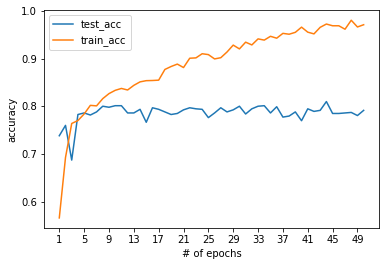

In [ ]:
plt.plot(range(1, epochs + 1), test_acc_history)
plt.plot(range(1, epochs + 1), history.history["accuracy"])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.legend(["test_acc", "train_acc"])
plt.xticks(np.arange(1, epochs + 1, int(((epochs + 1) / 11))))
plt.show()

In [ ]:
print("test_acc (every 5 epoch)", test_acc_history[::5])
print("train_acc (every 5 epoch)", history.history["accuracy"][::5])
print("mean_test_acc_after_20_epoch (plateau point)", mean(test_acc_history[20:]))
print("std_test_acc_after_20_epoch (plateau point)", stdev(test_acc_history[20:]))
print("F1_score:", calculate_f1(model, y_test))

test_acc (every 5 epoch) [0.738043487071991, 0.781521737575531, 0.801086962223053, 0.7967391014099121, 0.792391300201416, 0.7858695387840271, 0.783695638179779, 0.7989130616188049, 0.7945652008056641, 0.7847825884819031]
train_acc (every 5 epoch) [0.5655797123908997, 0.8018115758895874, 0.8373188376426697, 0.8539854884147644, 0.8811594247817993, 0.8992753624916077, 0.9344202876091003, 0.9427536129951477, 0.9554347991943359, 0.9688405990600586]
mean_test_acc_after_20_epoch (plateau point) 0.7897826075553894
std_test_acc_after_20_epoch (plateau point) 0.008542502544463993
F1_score: 0.7903930131004367


#### Generate dataset with the best features

In [ ]:
# preprocessed data and split them into training and test set
def split_data(top_eeg_feature_names, eog_features=True, test_size=0.25):
    # paramaters: top_eeg_feature_names, eg:["i_f (12, 16)", "pha (12, 16)", "amp (12, 16)", "scv (20, 24)"]
    top_eeg_features = list()
    for feature in top_eeg_feature_names:
        for chan in eeg_chans:
            top_eeg_features.append(chan + "_" + feature)
    top_eeg_features = eeg_features_full[top_eeg_features]
    X = top_eeg_features
    if eog_features == True:
        X = pd.concat([top_eeg_features, eog_features_full], axis=1)
    X = X.apply(lambda x: np.concatenate(x, axis=0), axis=1)  # flatten out the arrays in df object
    X = np.array(X.values.tolist())
    X = tf.keras.utils.normalize(X)  # normalize feature to avoid dominating feature 
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
    return x_train, x_test, y_train, y_test

In [ ]:
def get_dataset():
    top_eeg_feature_names = ["amp (12, 16)", "amp (8, 30)", "amp (10, 14)", "amp (24, 28)", "amp (14, 18)", "amp (22, 26)"]
    x_train, x_test, y_train, y_test = split_data(top_eeg_feature_names)
    X = np.concatenate([x_train, x_test], axis=0)  # use all the data as cv is performed on GridSearchCV()
    y = np.concatenate([y_train, y_test], axis=0)
    return X, y

### Tuning DNN with param_grid with Exhausted Grid Search Parameters Optimization
Wrap Keras model in sklearn: https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/

Note: this section can take about up to 2 hours with Tesla P100-PCIE-16GB GPU

In [ ]:
top_eeg_feature_names = ["amp (12, 16)", "amp (8, 30)", "amp (10, 14)", "amp (24, 28)"]
x_train, x_test, y_train, y_test = split_data(top_eeg_feature_names)
X = np.concatenate([x_train, x_test], axis=0)  # use all the data as cv is performed on GridSearchCV()
y = np.concatenate([y_train, y_test], axis=0)

In [ ]:
model = KerasClassifier(build_fn=create_nn)

In [ ]:
epochs = [15, 25, 35]
learn_rate = [0.0003, 0.0007, 0.001]
dropout_rate = [0.1, 0.4, 0.6]
param_grid = dict(learn_rate=learn_rate, epochs=epochs, dropout_rate=dropout_rate)
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=1, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, verbose=5, n_jobs=-1)
grid.fit(X, y)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.7923913078139657
{'dropout_rate': 0.6, 'epochs': 15, 'learn_rate': 0.0007}


In [ ]:
results_df = pd.DataFrame(grid.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dropout_rate,param_epochs,param_learn_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,16.026160,2.703841,0.390677,0.029146,0.1,15,0.0003,"{'dropout_rate': 0.1, 'epochs': 15, 'learn_rat...",0.783388,0.781759,0.771987,0.785016,0.758170,0.776144,0.776087,0.009152,25
1,13.515440,0.798541,0.380738,0.051093,0.1,15,0.0007,"{'dropout_rate': 0.1, 'epochs': 15, 'learn_rat...",0.773616,0.785016,0.780130,0.775244,0.767974,0.784314,0.777717,0.006059,23
2,13.970346,0.906210,0.380930,0.042928,0.1,15,0.001,"{'dropout_rate': 0.1, 'epochs': 15, 'learn_rat...",0.768730,0.780130,0.762215,0.789902,0.799020,0.753268,0.775543,0.015795,26
3,20.861677,0.877839,0.331875,0.061952,0.1,25,0.0003,"{'dropout_rate': 0.1, 'epochs': 25, 'learn_rat...",0.778502,0.771987,0.788274,0.758958,0.787582,0.794118,0.779891,0.011793,17
4,21.409694,0.905695,0.360411,0.037008,0.1,25,0.0007,"{'dropout_rate': 0.1, 'epochs': 25, 'learn_rat...",0.758958,0.780130,0.781759,0.786645,0.763072,0.763072,0.772283,0.010841,27
5,20.278373,0.938279,0.358718,0.042899,0.1,25,0.001,"{'dropout_rate': 0.1, 'epochs': 25, 'learn_rat...",0.786645,0.778502,0.781759,0.773616,0.777778,0.781046,0.779891,0.004006,16
6,29.071871,0.933783,0.371411,0.034573,0.1,35,0.0003,"{'dropout_rate': 0.1, 'epochs': 35, 'learn_rat...",0.775244,0.768730,0.776873,0.765472,0.779412,0.802288,0.777989,0.011851,22
7,28.365509,1.139664,0.361770,0.039535,0.1,35,0.0007,"{'dropout_rate': 0.1, 'epochs': 35, 'learn_rat...",0.776873,0.771987,0.789902,0.767101,0.781046,0.776144,0.777174,0.007151,24
8,29.095408,0.968258,0.358942,0.020700,0.1,35,0.001,"{'dropout_rate': 0.1, 'epochs': 35, 'learn_rat...",0.776873,0.754072,0.776873,0.796417,0.769608,0.795752,0.778261,0.014717,19
9,13.254054,0.780711,0.353650,0.043998,0.4,15,0.0003,"{'dropout_rate': 0.4, 'epochs': 15, 'learn_rat...",0.776873,0.781759,0.785016,0.794788,0.779412,0.767974,0.780978,0.008123,15


## Simple Vector Machine
The best feature is the combination of top 6 bands of amp feature and the 
lowpassed EOG features, we're going to use these combination on SVM

In [ ]:
top_eeg_feature_names = ["amp (12, 16)", "amp (8, 30)", "amp (10, 14)", "amp (24, 28)", "amp (14, 18)", "amp (22, 26)"]
x_train, x_test, y_train, y_test = split_data(top_eeg_feature_names)
X = np.concatenate([x_train, x_test], axis=0)  # use all the data as cv is performed on GridSearchCV()
y = np.concatenate([y_train, y_test], axis=0)
X.shape

(3680, 19584)

##### Reduce dimensionality of the features with LDA (Linear Discriminant Analysis)
link: https://machinelearningmastery.com/linear-discriminant-analysis-for-dimensionality-reduction-in-python/#:~:text=Linear%20Discriminant%20Analysis%2C%20or%20LDA,examples%20by%20their%20assigned%20class.

In [ ]:
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('svc', SVC())]  # number of components cannot be greater than min (num_class - 1, num_feature)
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=1, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), stdev(n_scores)))

Accuracy: 0.543 (0.041)


##### Reduce dimensionality of the features with PCA (Principle Component Analysis)
link: https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/

In [ ]:
X, y = get_dataset()
X.shape, y.shape

((3680, 19584), (3680,))

In [ ]:
all_n_scores_pca = list()
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=1, random_state=1)
n_scores_without_pca = cross_val_score(LogisticRegression(), X, y, scoring='f1', cv=cv)
for i in range(500, 3001, 500):
  steps = [('pca', PCA(n_components=i)), ('lr', LogisticRegression())]  # num of n_components allowed cap at 3066 for 6 folds
  model = Pipeline(steps=steps)
  # evaluate model
  n_scores_pca = cross_val_score(model, X, y, scoring='f1', cv=cv, error_score='raise')
  all_n_scores_pca.append(n_scores_pca)

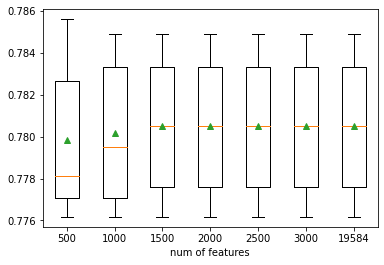

500 accuracy: 0.780 (0.004)
1000 accuracy: 0.780 (0.004)
1500 accuracy: 0.780 (0.004)
2000 accuracy: 0.780 (0.004)
2500 accuracy: 0.780 (0.004)
3000 accuracy: 0.780 (0.004)
19584 accuracy: 0.780 (0.004)


In [ ]:
# report performance
all_n_scores_pca.append(n_scores_without_pca)
labels = [str(i) for i in range(500, 3001, 500)]
labels.append(str(X.shape[1]))
plt.boxplot(all_n_scores_pca, labels=labels, showmeans=True)
plt.xlabel("num of features")
plt.show()
for i in range(len(labels)):
  print('%s accuracy: %.3f (%.3f)' % (labels[i], mean(all_n_scores_pca[i]), stdev(all_n_scores_pca[i])))   

##### Choosing Best K in KFold

In [ ]:
Kfolds = [2, 3, 4, 5, 6, 7, 8, 9, 10]
acc_dict = {}
for fold in Kfolds:
    cv = RepeatedStratifiedKFold(n_splits=fold, n_repeats=3, random_state=1)
    all_accuracies = cross_val_score(SVC(), X=X, y=y, cv=cv, n_jobs=-1)
    acc_dict[str(fold)] = all_accuracies
    print(f"{fold} fold: {mean(all_accuracies)}")

>2 0.768 (0.011)
>3 0.775 (0.011)
>4 0.778 (0.010)
>5 0.778 (0.016)
>6 0.782 (0.014)
>7 0.782 (0.016)
>8 0.781 (0.014)
>9 0.782 (0.019)
>10 0.780 (0.020)


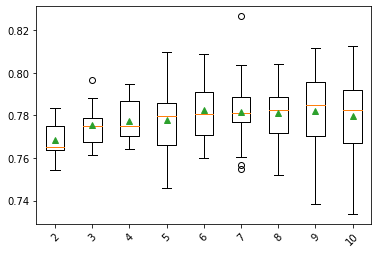

In [ ]:
# evaluate the models and store results
results, names = list(), list()
for name, acc in acc_dict.items():
    results.append(acc)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(acc), stdev(acc)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

##### Tuning SVM with param_grid with Randomized Parameters Optimization
link: https://scikit-learn.org/stable/modules/grid_search.html

In [ ]:
top_eeg_feature_names = ["amp (12, 16)", "amp (8, 30)", "amp (10, 14)", "amp (24, 28)"]
x_train, x_test, y_train, y_test = split_data(top_eeg_feature_names)
X = np.concatenate([x_train, x_test], axis=0)  # use all the data as cv is performed on GridSearchCV()
y = np.concatenate([y_train, y_test], axis=0)

In [ ]:
space = {'C': loguniform(1e-5, 1), 'gamma': loguniform(1e-6, 1), 'kernel': ['rbf', 'poly']}
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=1, random_state=1)

In [ ]:
# define search
search = RandomizedSearchCV(SVC(), space, n_iter=10, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X, y)

In [ ]:
print(result.best_score_)
print(result.best_params_)

0.7116776749862286
{'C': 0.022321849928717594, 'gamma': 0.4104255840130687, 'kernel': 'rbf'}


In [ ]:
results_df = pd.DataFrame(result.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,408.675811,2.163754,79.303652,0.304676,0.00121649,0.0209868,poly,"{'C': 0.001216494146415184, 'gamma': 0.0209868...",0.701954,0.656352,0.499184,0.499184,0.499184,0.499184,0.559174,0.085853,8
1,406.368212,0.995035,84.321749,0.758248,4.37142e-05,0.986832,rbf,"{'C': 4.3714170280227434e-05, 'gamma': 0.98683...",0.710098,0.677524,0.499184,0.499184,0.499184,0.499184,0.564060,0.092229,6
2,405.449625,1.137642,77.457565,0.519289,2.8953e-05,1.31087e-05,poly,"{'C': 2.8952960233492824e-05, 'gamma': 1.31087...",0.732899,0.729642,0.499184,0.499184,0.499184,0.499184,0.576546,0.109410,3
3,384.048243,2.332532,78.089981,0.669193,0.0223218,0.410426,rbf,"{'C': 0.022321849928717594, 'gamma': 0.4104255...",0.734528,0.714984,0.721044,0.696574,0.704731,0.698206,0.711678,0.013408,1
4,408.427596,1.204481,79.409710,0.436532,0.0012473,0.0129216,poly,"{'C': 0.0012473047378928966, 'gamma': 0.012921...",0.701954,0.656352,0.499184,0.499184,0.499184,0.499184,0.559174,0.085853,8
5,407.735115,1.978035,84.897509,0.785434,0.00164917,2.38486e-05,rbf,"{'C': 0.0016491663656852517, 'gamma': 2.384862...",0.701954,0.688925,0.499184,0.499184,0.499184,0.499184,0.564603,0.092592,4
6,405.287682,1.524867,78.158883,0.743789,0.022508,0.000319028,poly,"{'C': 0.022508033397597497, 'gamma': 0.0003190...",0.701954,0.656352,0.499184,0.499184,0.499184,0.499184,0.559174,0.085853,8
7,408.247468,2.388112,82.423728,0.530272,0.00142394,0.431287,rbf,"{'C': 0.0014239437572248638, 'gamma': 0.431287...",0.708469,0.669381,0.499184,0.499184,0.499184,0.499184,0.562431,0.090154,7
8,397.851868,1.539449,77.737729,0.495447,0.100861,0.645014,poly,"{'C': 0.10086090098685987, 'gamma': 0.64501446...",0.723127,0.700326,0.730832,0.693312,0.704731,0.698206,0.708422,0.013725,2
9,281.862634,89.368908,52.858681,18.015413,2.91074e-05,0.00128504,rbf,"{'C': 2.910744216446768e-05, 'gamma': 0.001285...",0.701954,0.688925,0.499184,0.499184,0.499184,0.499184,0.564603,0.092592,4


##### Tuning SVM with param_grid with Exhausted Grid Search Parameters Optimization

In [ ]:
top_eeg_feature_names = ["amp (12, 16)", "amp (8, 30)", "amp (10, 14)", "amp (24, 28)", "amp (14, 18)", "amp (22, 26)"]
x_train, x_test, y_train, y_test = split_data(top_eeg_feature_names)
X = np.concatenate([x_train, x_test], axis=0)  # use all the data as cv is performed on GridSearchCV()
y = np.concatenate([y_train, y_test], axis=0)

In [ ]:
space = {'C': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10], 'kernel': ['poly', 'rbf']}
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=2, random_state=1)

In [ ]:
# define search
search = GridSearchCV(SVC(), param_grid=space, n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y)

In [ ]:
print(result.best_score_)
print(result.best_params_)

0.7835541196621163
{'C': 3, 'kernel': 'rbf'}


In [ ]:
results_df = pd.DataFrame(result.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,...,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,mean_test_score,std_test_score,rank_test_score
0,646.316436,70.882327,131.936252,15.016786,0.0001,poly,"{'C': 0.0001, 'kernel': 'poly'}",0.701954,0.651466,0.499184,...,0.499184,0.675896,0.679153,0.499184,0.499184,0.499184,0.499184,0.558495,0.084512,19
1,800.907434,23.911023,162.048606,4.033401,0.0001,rbf,"{'C': 0.0001, 'kernel': 'rbf'}",0.687296,0.695440,0.499184,...,0.499184,0.688925,0.708469,0.499184,0.499184,0.499184,0.499184,0.564467,0.092449,15
2,757.774082,42.558931,143.666771,12.117298,0.0003,poly,"{'C': 0.0003, 'kernel': 'poly'}",0.701954,0.651466,0.499184,...,0.499184,0.675896,0.679153,0.499184,0.499184,0.499184,0.499184,0.558495,0.084512,19
3,686.864120,5.753151,138.579188,3.581577,0.0003,rbf,"{'C': 0.0003, 'kernel': 'rbf'}",0.687296,0.695440,0.499184,...,0.499184,0.688925,0.708469,0.499184,0.499184,0.499184,0.499184,0.564467,0.092449,15
4,686.298024,5.603014,133.625601,2.684316,0.001,poly,"{'C': 0.001, 'kernel': 'poly'}",0.701954,0.651466,0.499184,...,0.499184,0.675896,0.679153,0.499184,0.499184,0.499184,0.499184,0.558495,0.084512,19
5,663.672805,20.565056,128.421986,10.089168,0.001,rbf,"{'C': 0.001, 'kernel': 'rbf'}",0.687296,0.695440,0.499184,...,0.499184,0.688925,0.708469,0.499184,0.499184,0.499184,0.499184,0.564467,0.092449,15
6,601.785127,15.920362,116.609382,3.331365,0.003,poly,"{'C': 0.003, 'kernel': 'poly'}",0.701954,0.651466,0.499184,...,0.499184,0.675896,0.679153,0.499184,0.499184,0.499184,0.499184,0.558495,0.084512,19
7,583.569477,2.498976,121.359781,1.261386,0.003,rbf,"{'C': 0.003, 'kernel': 'rbf'}",0.687296,0.695440,0.499184,...,0.499184,0.688925,0.708469,0.499184,0.499184,0.499184,0.499184,0.564467,0.092449,15
8,578.275328,2.448693,115.213442,0.561521,0.01,poly,"{'C': 0.01, 'kernel': 'poly'}",0.716612,0.706840,0.717781,...,0.693312,0.690554,0.719870,0.709625,0.675367,0.727569,0.691680,0.704482,0.014431,13
9,608.625978,16.330733,128.950438,4.277950,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",0.687296,0.695440,0.624796,...,0.707993,0.688925,0.708469,0.610114,0.621533,0.675367,0.693312,0.666968,0.035378,14


## Ensemble Model 


####Stacking Models
link: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

note: DNN model created by Keras cannot be stacked using StackingClassifier due to an internal bug that cannot be fixed on the client side

In [ ]:
# get a stacking ensemble of models
def get_stacking(verbosity=0):
    # define the base models
    level0 = list()
    # dnn = KerasClassifier(build_fn=create_nn, batch_size=64, epochs=15, dropout_rate=0.6)
    # dnn._estimator_type = "classifier"
    # level0.append(('dnn', dnn))
    level0.append(('lr', LogisticRegression()))
    level0.append(('svm', SVC(C=3)))
    level0.append(('ada', AdaBoostClassifier()))
    level0.append(('rfor', RandomForestClassifier()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=6, verbose=verbosity)
    return model
 
def get_models():
    models = dict()
    dnn = KerasClassifier(build_fn=create_nn, batch_size=64, epochs=15, dropout_rate=0.6, verbose=0)
    dnn._estimator_type = "classifier"
    models['ada'] = AdaBoostClassifier()
    models['dnn'] = dnn
    models['rfor'] = RandomForestClassifier()
    models['lr'] = LogisticRegression()
    models['svm'] = SVC(C=3)
    models['stacking'] = get_stacking()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=1, random_state=1)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, error_score='raise', verbose=0)
    return scores

Note: the training process can take up to 4 hours with GPU due to the convoluted nature of ensemble model

In [ ]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), stdev(scores)))

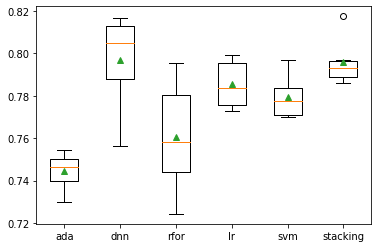

In [ ]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

#### Stacking DNN
Since Keras DNN has the best performance, we'll stack it together with the stacking model described in Stacking Models using custom_stacking_model.

In [ ]:
def custom_ensemble_model(X, y, verbose=0):
  model = LogisticRegression(verbose=verbose)
  model.fit(X, y)
  return model

##### K-Fold Cross-Validation for DNN, Stacked, and Ensemble
link: https://www.machinecurve.com/index.php/2020/02/18/how-to-use-k-fold-cross-validation-with-keras/#evaluating-and-selecting-models-with-k-fold-cross-validation

note: because there is no current working way of ensembling keras wrapped model with sklearn model because keras models returns incompatible shape with sklearn models upon generating predictions. we have to create a custom_stacking_model for the two.

In [ ]:
# define dataset
X, y = get_dataset()
# apply PCA for faster training time
pca = PCA()
# prepare transform on dataset
pca.fit(X)
# apply transform to dataset
X = pca.transform(X)
# summarize the dataset
print(X.shape, y.shape)

(3680, 3680) (3680,)


In [ ]:
# Model configuration
batch_size = 64
no_epochs = 15
verbosity = 0
num_folds = 6 

# Define per-fold score containers
dnn_scores = []
stacked_scores = []
ensemble_scores = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1  # don't change this number
# inputs, targets = get_dataset()
inputs = X
targets = y

for train, test in kfold.split(inputs, targets):
    # Define the model architecture
    dnn = create_nn(0.6)
    stacked = get_stacking()
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    dnn.fit(inputs[train], targets[train],
                      batch_size=batch_size,
                      epochs=no_epochs,
                      verbose=verbosity)
    stacked.fit(inputs[train], targets[train])

    dnn_predictions_for_ensemble = tf.squeeze(dnn.predict(inputs[train]), axis=1)
    stacked_predictions_for_ensemble = stacked.predict_proba(inputs[train])[:, 1]
    ensemble_input = np.stack([dnn_predictions_for_ensemble, stacked_predictions_for_ensemble], axis=-1)
    ensemble_model = custom_ensemble_model(ensemble_input, targets[train])

    # process the prediction so shape match
    dnn_predictions = dnn.predict(inputs[test])
    dnn_predictions = dnn_predictions.squeeze()
    stacked_predictions = stacked.predict_proba(inputs[test])[:, 1]
    ensemble_input = np.stack([dnn_predictions, stacked_predictions], axis=-1)
    ensemble_predictions = ensemble_model.predict_proba(ensemble_input)[:, 1]

    # to get a sense of how the ensemble model is weighting the predictions from the submodels
    print(dnn_predictions[0])
    print(stacked_predictions[0])
    print(ensemble_predictions[0])

    # convert to one-hot-key encoding
    dnn_predictions = np.where(dnn_predictions > 0.5, 1, 0).astype(int)
    stacked_predictions = np.where(stacked_predictions > 0.5, 1, 0).astype(int)
    ensemble_predictions = np.where(ensemble_predictions > 0.5, 1, 0).astype(int)

    dnn_score = f1_score(targets[test], dnn_predictions)
    stacked_score = f1_score(targets[test], stacked_predictions)
    ensemble_score = f1_score(targets[test], ensemble_predictions)

    dnn_scores.append(dnn_score)
    stacked_scores.append(stacked_score)
    ensemble_scores.append(ensemble_score)
    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
0.0013823576
0.33035112618984414
0.012727716668954723
------------------------------------------------------------------------
Training for fold 2 ...
0.0002492606
0.23026657209227624
0.006795973505593914
------------------------------------------------------------------------
Training for fold 3 ...
0.6644121
0.3496287185191263
0.6110795059492654
------------------------------------------------------------------------
Training for fold 4 ...
0.9999629
0.8569148388245542
0.995551476792846
------------------------------------------------------------------------
Training for fold 5 ...
3.4270406e-07
0.09844360503093812
0.002715878447404063
------------------------------------------------------------------------
Training for fold 6 ...
0.00019026107
0.2408677938470422
0.005646372890900518


# Save Models and Submit Prediction


#### Save Keras and Sklearn models

link: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [ ]:
top_eeg_feature_names = ["amp (12, 16)", "amp (8, 30)", "amp (10, 14)", "amp (24, 28)", "amp (14, 18)", "amp (22, 26)"]
x_train, x_test, y_train, y_test = split_data(top_eeg_feature_names, test_size=0.167)

In [ ]:
# Fit the model on training set
dnn = create_nn(dropout_rate=0.6)
dnn.fit(x_train, y_train, batch_size=64, epochs=15)
# save the model to disk
dnn.save("dnn_model.h5")

In [ ]:
stacked = get_stacking()
stacked.fit(x_train, y_train)
pickle.dump(stacked, open('stacked_model.sav', 'wb'))


#### Load and Preprocess All Test Patient Data

In [ ]:
x_test_df_original = pd.read_pickle('data/epoched_test.pkl')

In [ ]:
x_test_df = x_test_df_original.drop(["patient_id", "start_time"], axis=1)
x_test_df.head()

,C3,Cz,C4,EOG:ch01,EOG:ch02,EOG:ch03
trial_id,,,,,,
0,"[-0.5372405372405372, -0.31746031746031744, -0...","[-0.04884004884004884, 0.757020757020757, 1.41...","[-1.831501831501832, -1.514041514041514, 0.659...","[-5.372405372405372, -2.4420024420024418, -1.4...","[1.4652014652014649, 0.4884004884004883, 1.465...","[-3.4188034188034178, 4.395604395604395, 0.488..."
1,"[1.2210012210012209, 0.02442002442002442, 1.14...","[1.9780219780219777, 1.7094017094017089, 1.538...","[1.831501831501832, 1.5628815628815629, 0.8058...","[4.395604395604395, 5.86080586080586, -0.48840...","[8.79120879120879, 9.27960927960928, 6.8376068...","[19.53601953601953, 19.047619047619047, 10.744..."
2,"[1.1233211233211229, 0.7326007326007324, 0.048...","[2.2710622710622705, 2.075702075702076, 1.0744...","[-2.686202686202685, -2.686202686202685, -1.80...","[4.395604395604395, 6.349206349206349, 1.46520...","[25.396825396825395, 27.83882783882784, 24.908...","[11.23321123321123, 3.907203907203906, 7.32600..."
3,"[3.3211233211233213, 3.6141636141636138, 3.418...","[2.295482295482296, 4.102564102564102, 4.22466...","[-0.12210012210012207, -0.8058608058608058, -0...","[11.23321123321123, 6.349206349206349, 13.6752...","[20.024420024420024, 7.326007326007326, 19.536...","[17.58241758241758, 9.27960927960928, 12.21001..."
4,"[2.9059829059829063, 2.8815628815628815, 2.442...","[3.809523809523808, 5.4212454212454215, 3.6630...","[1.7338217338217337, 3.394383394383393, 4.2735...","[11.23321123321123, 3.907203907203906, 5.86080...","[10.744810744810744, 13.186813186813184, 13.67...","[-7.326007326007326, -3.4188034188034178, 7.81..."


In [ ]:
filters = ["amp"]
f_ranges = [(12, 16), (8, 30), (10, 14), (24, 28), (14, 18), (22, 26)]

#### Process EEG channels

In [ ]:
def filter_eeg(sig, f_range, pass_type, name):
    start_f, end_f = f_range
    if name == "fir":
        return filter_signal_fir(sig, eeg_fs, pass_type, f_range)
    if name == "psd":
        interval = range(2 * start_f, 2 * end_f + 1)  # correspond to frequency of f_range
        freq_mean, psd_mean = getMeanFreqPSD(sig)
        return psd_mean[interval]
    if name == "lag":
        lag, freqs = compute_lagged_coherence(sig, eeg_fs, f_range, return_spectrum=True)
        return lag
    if name == "amp":
        return amp_by_time(sig, eeg_fs, f_range)
    if name == "pha":
        return phase_by_time(sig, eeg_fs, f_range)
    if name == "i_f":
        return freq_by_time(sig, eeg_fs, f_range)
    if name == "scv":
        interval = range(start_f, end_f + 1)  # correspond to frequency of f_range
        freqs, scv = compute_scv(sig, eeg_fs)
        return scv[interval]

In [ ]:
filter_collection = {}
for f_range in f_ranges:
    print(str(f_range) + " is being processed")
    for _filter in filters:
        for chan in eeg_chans:
            curr_key = chan + "_" + _filter + " " + str(f_range)
            if curr_key not in filter_collection:
                filter_collection[curr_key] = list()
            for i in range(len(x_test_df)):
                processed_signal = filter_eeg(x_test_df[chan][i], f_range, "bandpass", _filter) 
                processed_signal = processed_signal[~np.isnan(processed_signal)]  
                filter_collection[curr_key].append(processed_signal)
filtered_eeg = pd.DataFrame(filter_collection)            
filtered_eeg.head()
assert int(filtered_eeg.shape[1] / 3) == len(filters) * len(f_ranges)

#### Process EOG channels

In [ ]:
filters = ["fir"]
filter_collection = {}
f_ranges = [(None, 7)]
for f_range in f_ranges:
    print(str(f_range) + " is being processed")
    for chan in eog_chans:
        for _filter in filters:
            curr_key = chan + "_" + _filter + " " + str(f_range)
            if curr_key not in filter_collection:
                filter_collection[curr_key] = list()
            for i in range(len(x_test_df)):
                processed_signal = filter_eeg(x_test_df[chan][i], f_range, "lowpass", _filter) 
                processed_signal = processed_signal[~np.isnan(processed_signal)]  
                filter_collection[curr_key].append(processed_signal)
filtered_eog = pd.DataFrame(filter_collection)            
filtered_eog.head()

(None, 7) is being processed


,"EOG:ch01_fir (None, 7)","EOG:ch02_fir (None, 7)","EOG:ch03_fir (None, 7)"
0,"[7.14105258419311, 7.298296310023192, 7.408941...","[9.060167015032109, 9.25321461009826, 9.406797...","[8.219396734869202, 8.109117965402437, 7.95691..."
1,"[-2.1938458193505492, -2.1062747241994364, -2....","[-0.568068782637818, -0.699155387582742, -0.88...","[-1.9540697266492746, -2.0326171470896837, -2...."
2,"[1.418923974002041, 1.20022556623996, 0.970155...","[3.239918235217495, 2.7642140945765155, 2.2793...","[-7.7239629478304845, -7.758159805310048, -7.7..."
3,"[12.578934103077309, 12.45817515820984, 12.333...","[17.23279446842517, 17.558934078202324, 17.806...","[-2.3993866180598844, -2.4999621406830537, -2...."
4,"[8.758327646258786, 8.66620466666752, 8.520639...","[12.337556321233544, 12.192853708987151, 11.99...","[-1.86132017548096, -1.6698040698601047, -1.52..."


#### Final Prediction
Note: due to the high dimensionality of our features and ample amounts of test data, we do not use the identical training set mean and variance to normalize the test data, as the distribution is approximately normal.

In [ ]:
x_test_df = pd.concat([filtered_eeg, filtered_eog], axis=1)
x_test_df.head()

,"C3_amp (12, 16)","Cz_amp (12, 16)","C4_amp (12, 16)","C3_amp (8, 30)","Cz_amp (8, 30)","C4_amp (8, 30)","C3_amp (10, 14)","Cz_amp (10, 14)","C4_amp (10, 14)","C3_amp (24, 28)","Cz_amp (24, 28)","C4_amp (24, 28)","C3_amp (14, 18)","Cz_amp (14, 18)","C4_amp (14, 18)","C3_amp (22, 26)","Cz_amp (22, 26)","C4_amp (22, 26)","EOG:ch01_fir (None, 7)","EOG:ch02_fir (None, 7)","EOG:ch03_fir (None, 7)"
0,"[0.4088481686222716, 0.45342527960727635, 0.49...","[1.5102666370358955, 1.5423279817806765, 1.569...","[1.0383187493285284, 1.0817380144991788, 1.131...","[2.1540188286503383, 1.8720641319589872, 1.520...","[2.437318722366804, 2.5556146773160573, 2.6226...","[2.866465837979282, 2.6489662087286097, 2.3795...","[1.001877036870047, 1.0313122524591278, 1.0602...","[1.9233591775464258, 1.9507475242708563, 1.966...","[1.7926743267516887, 1.8031058394367963, 1.810...","[0.6680826652654462, 0.8174631466435596, 0.959...","[0.6525490627705647, 0.6134572980035926, 0.564...","[1.0612086149817073, 1.1289863128089817, 1.176...","[0.10961011853541315, 0.09726991256859256, 0.1...","[1.1583796137650098, 1.18637383989991, 1.20860...","[0.252732128093294, 0.201704657402558, 0.21575...","[0.6316481484587164, 0.7535736002470405, 0.844...","[0.6011134635253954, 0.5347372014945747, 0.454...","[1.0669841896174859, 1.1214087637364474, 1.156...","[7.14105258419311, 7.298296310023192, 7.408941...","[9.060167015032109, 9.25321461009826, 9.406797...","[8.219396734869202, 8.109117965402437, 7.95691..."
1,"[0.4886733457771668, 0.4578777846986623, 0.426...","[0.6435027753135371, 0.6057081257088954, 0.611...","[0.6017126196820185, 0.6061853740946882, 0.618...","[0.847775924344604, 1.1482937734976368, 1.4620...","[2.591129056350607, 2.6712281258933688, 2.6639...","[1.8102502496150854, 1.901660943740111, 1.9541...","[0.6085595999887875, 0.6402888673669886, 0.677...","[1.1347393041474387, 1.1245721006522984, 1.106...","[0.36091619658727064, 0.3232845318134638, 0.30...","[0.5970585065627428, 0.46177668117316717, 0.32...","[0.626884535264066, 0.687036924431831, 0.74480...","[0.2753670930628853, 0.3359097032079714, 0.423...","[0.6944349549147592, 0.6595593254540525, 0.616...","[0.5385631644241294, 0.43735916847887135, 0.36...","[0.0733694417387063, 0.18141810878526773, 0.27...","[0.7400175299920133, 0.647278953215686, 0.5951...","[0.9210780030733929, 0.9312855931227273, 0.940...","[0.5481042957765334, 0.6120296686103558, 0.671...","[-2.1938458193505492, -2.1062747241994364, -2....","[-0.568068782637818, -0.699155387582742, -0.88...","[-1.9540697266492746, -2.0326171470896837, -2...."
2,"[0.4320864195785808, 0.34974656981749425, 0.28...","[1.368368216699606, 1.2720816496939917, 1.1729...","[1.1160548484401507, 1.0908290366702666, 1.073...","[3.064423562960913, 3.1239128089136314, 3.1538...","[2.936780872055183, 3.307334214266415, 3.60544...","[3.3267054944640173, 3.3616050587841793, 3.315...","[1.040750974154136, 1.0736729977152613, 1.1092...","[0.8406857176245836, 0.801809364124047, 0.7855...","[0.44866309291890855, 0.407986966728675, 0.381...","[0.5952651047601141, 0.5650682139659885, 0.566...","[0.23388800595196785, 0.37458356329944786, 0.5...","[1.143547967908129, 1.1665651859382111, 1.1838...","[1.0184193426722614, 0.9722924790102216, 0.920...","[1.8494302992212015, 1.8287042908013174, 1.797...","[0.8695769312711112, 0.8634344604499673, 0.870...","[0.3397528932057543, 0.33921709926146654, 0.38...","[0.4631705112558819, 0.5787220150406753, 0.701...","[1.3672010437668165, 1.381086987161706, 1.3905...","[1.418923974002041, 1.20022556623996, 0.970155...","[3.239918235217495, 2.7642140945765155, 2.2793...","[-7.7239629478304845, -7.758159805310048, -7.7..."
3,"[1.6836652350684795, 1.7464448962225205, 1.800...","[1.3421467907172575, 1.4015524315427983, 1.457...","[1.3318057644497154, 1.3572910607514477, 1.361...","[2.534368678851222, 2.7205886968169595, 2.8874...","[1.9283061620304378, 2.4764774018893103, 3.048...","[1.4944886479882828, 1.1456066073664695, 0.749...","[1.841

In [ ]:
X = x_test_df.apply(lambda x_test_df: np.concatenate(x_test_df, axis=0), axis=1)  # flatten out the arrays in df object
X = np.array(X.values.tolist())
X = tf.keras.utils.normalize(X)  # normalize feature to avoid dominating feature 

##### DNN predictions 

In [ ]:
# load the model from disk
loaded_dnn = load_model('dnn_model.h5')

In [ ]:
predictions = loaded_dnn.predict(X)
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0
predictions = pd.DataFrame(predictions.astype(int), columns=["event_type"])
predictions.index.name = 'trial_id'
predictions.to_csv("dnn_final_predictions.csv")

##### Ensemble predictions excluding DNN

In [ ]:
loaded_stacked = pickle.load(open('stacked_model.sav', 'rb'))

In [ ]:
predictions = loaded_stacked.predict(X)
predictions = pd.DataFrame(predictions.astype(int), columns=["event_type"])
predictions.index.name = 'trial_id'
predictions.to_csv("stacked_final_predictions.csv")

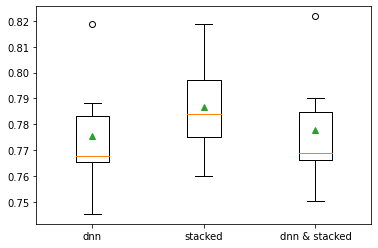

dnn accuracy: 0.775 (0.025)
stacked accuracy: 0.787 (0.021)
dnn & stacked accuracy: 0.778 (0.025)


In [ ]:
# report performance
all_scores = [dnn_scores, stacked_scores, ensemble_scores]
all_model_names = ['dnn', 'stacked', 'dnn & stacked']
plt.boxplot(all_scores, labels=all_model_names, showmeans=True)
plt.show()
for idx, score in enumerate(all_scores):
  print('%s accuracy: %.3f (%.3f)' % (all_model_names[idx], mean(score), stdev(score)))